In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
# Load the data from the CSV file
data = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/Big Data/repo/big_data_ai-1/imdp.csv',encoding='latin-1')



#
#
#
#
#
### EDA

In [2]:
df1 = data

# Check the first five rows of the data
print(df1.head())

       director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fant

In [3]:
# Check the summary statistics of the numerical columns
print(df1.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

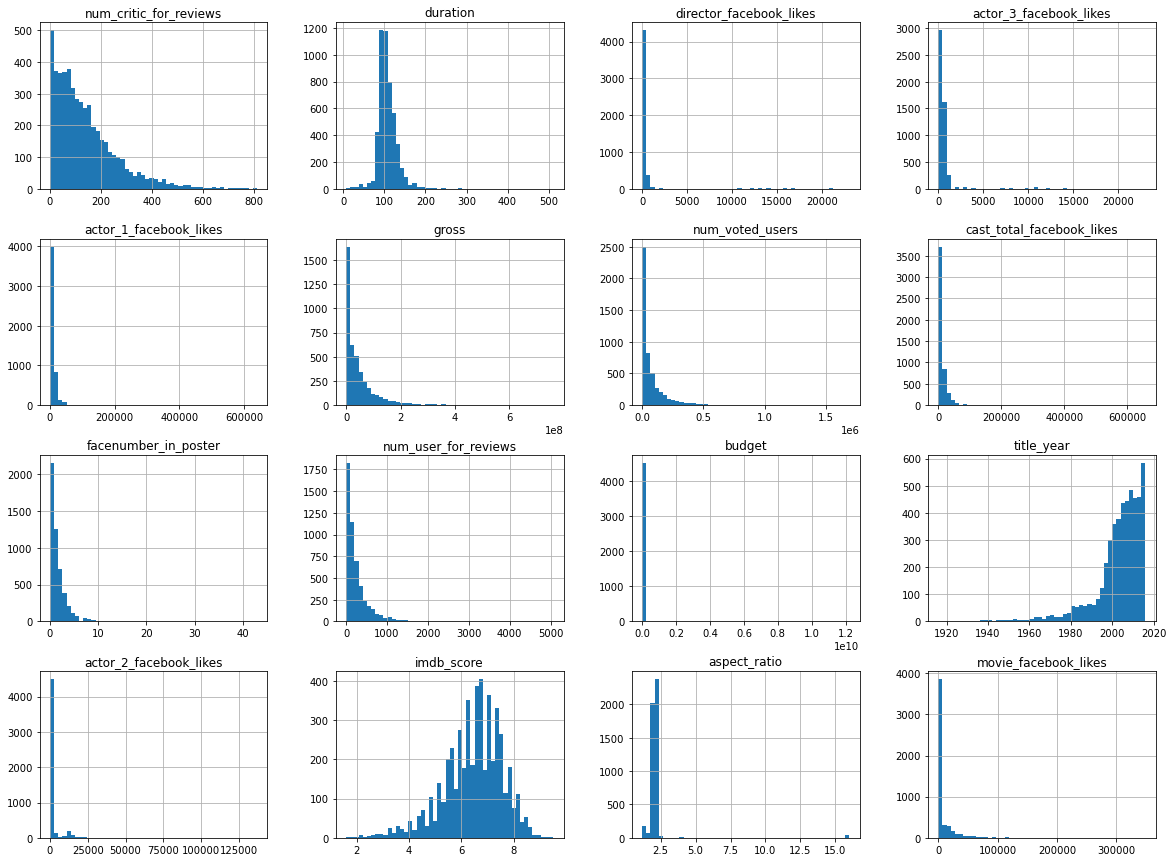

In [4]:
# Plot histograms for each numerical column
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# Check for missing values
missing_values = df1.isna().sum()
print(missing_values)

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [6]:
missing_values_count = df1.isnull().sum()
total_missing_values = missing_values_count.sum()
print(total_missing_values)

2679


#
#
#
#
#
### Preprocessing

In [7]:
#fill in the missing values with mean 
df2 = data
df2 = df2.fillna(df2.mean())

/var/folders/j4/2_v3b6vn7t98z8kg_njz6lv00000gn/T/ipykernel_49794/2221282263.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df2.fillna(df2.mean())


In [8]:
# Select the target variable
y = df2["num_critic_for_reviews"]
y 

0       723.000000
1       302.000000
2       602.000000
3       813.000000
4       140.194272
           ...    
5038      1.000000
5039     43.000000
5040     13.000000
5041     14.000000
5042     43.000000
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [9]:
# Select only the numerical features
df2 = df2.select_dtypes(include=[np.number])
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.000000,178.000000,0.0,855.000000,1000.0,7.605058e+08,886204,4834,0.0,3054.000000,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,302.000000,169.000000,563.0,1000.000000,40000.0,3.094042e+08,471220,48350,0.0,1238.000000,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,602.000000,148.000000,0.0,161.000000,11000.0,2.000742e+08,275868,11700,1.0,994.000000,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,813.000000,164.000000,22000.0,23000.000000,27000.0,4.481306e+08,1144337,106759,0.0,2701.000000,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,140.194272,107.201074,131.0,645.009761,131.0,4.846841e+07,8,143,0.0,272.770808,3.975262e+07,2002.470517,12.0,7.1,2.220403,0


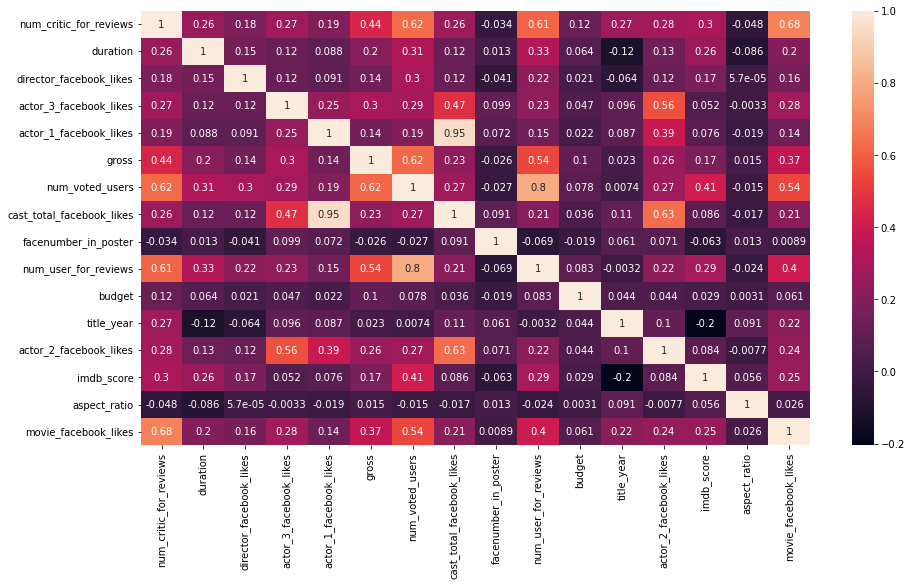

In [10]:

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
# Select the features that are highly correlated with the target variable (num_critic_for_reviews)
corr_target = abs(corr_matrix["num_critic_for_reviews"])
high_corr_features = corr_target[corr_target > 0.5]
print(high_corr_features)

num_critic_for_reviews    1.000000
num_voted_users           0.623805
num_user_for_reviews      0.608509
movie_facebook_likes      0.682669
Name: num_critic_for_reviews, dtype: float64


In [12]:

# Ignore the features that are highly correlated with each other
X = df2[high_corr_features.index]

In [13]:
XX = ['num_voted_users','num_user_for_reviews','movie_facebook_likes']
X = X[XX]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [15]:

# Fill in missing values with the mean
#X_train = X_train.fillna(df2.mean())
#y_train = y_train.fillna(df2.mean())


In [16]:
y_train.isna().sum()

0

#
#
#
### Train Model

In [17]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test data
y_pred = model.predict(X_test)

#
#
#
### Evaluate Model

Text(0, 0.5, 'y_pred')

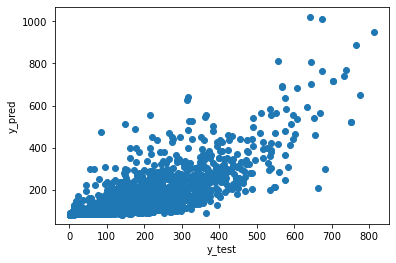

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [20]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mspe = mean_absolute_percentage_error(y_test,y_pred)

In [21]:

# Print the mean squared error
print("Mean Squared Error:", mse)
print("Squared Correlation:",r2)
print("Mean Absolute Percentage Error:",mspe)
print("Root Mean Square Error:",np.sqrt(mse))

Mean Squared Error: 5723.8489168191845
Squared Correlation: 0.6206312792467907
Mean Absolute Percentage Error: 2.241561689056175
Root Mean Square Error: 75.6561227979546


#
#
#
### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
xxx = df2.drop('num_critic_for_reviews', axis=1)
yyy = df2['num_critic_for_reviews']

In [23]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3)
scores = cross_val_score(model, xxx, yyy, cv=cv, scoring='r2')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.64 accuracy with a standard deviation of 0.01
